**Importing Dtasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
credit_score_data = pd.read_csv("/content/credit_score_cleaned_train.csv")
df = credit_score_data.copy()

**Exploratory Data Analysis**

In [ ]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,11.27,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,11.27,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,6.27,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2


In [ ]:
id = np.arange(0,df.shape[0])
id.shape

(96696,)

In [ ]:
df.shape

(96696, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  object 
 1   customer_id               96696 non-null  object 
 2   month                     96696 non-null  object 
 3   name                      96696 non-null  object 
 4   age                       96696 non-null  int64  
 5   ssn                       96696 non-null  object 
 6   occupation                96696 non-null  object 
 7   annual_income             96696 non-null  float64
 8   monthly_inhand_salary     96696 non-null  float64
 9   credit_history_age        96696 non-null  int64  
 10  total_emi_per_month       96696 non-null  float64
 11  num_bank_accounts         96696 non-null  int64  
 12  num_credit_card           96696 non-null  int64  
 13  interest_rate             96696 non-null  int64  
 14  num_of

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96696.0,33.942448,10.377550,16.00000,25.000000,34.000000,42.000000,56.0000
annual_income,96696.0,50898.597475,38543.773796,7006.03500,19480.040000,37367.340000,72245.760000,179987.2800
monthly_inhand_salary,96696.0,4231.402393,3207.836030,303.64542,1634.720800,3116.120850,6016.623500,15204.6340
credit_history_age,96696.0,78.471529,33.291894,-1.00000,53.000000,78.000000,106.000000,147.0000
total_emi_per_month,96696.0,106.502641,130.404213,0.00000,28.636501,65.712006,145.756870,3776.0000
num_bank_accounts,96696.0,5.319134,2.597916,0.00000,3.000000,5.000000,7.000000,11.0000
num_credit_card,96696.0,5.498211,2.057083,0.00000,4.000000,5.000000,7.000000,11.0000
interest_rate,96696.0,14.347646,8.708524,1.00000,7.000000,13.000000,20.000000,34.0000
num_of_loan,96696.0,3.481344,2.435098,0.00000,2.000000,3.000000,5.000000,9.0000
delay_from_due_date,96696.0,20.806931,14.785004,-5.00000,10.000000,18.000000,28.000000,67.0000


In [ ]:
df.describe(exclude=np.number).T

,count,unique,top,freq
id,96696,96696,0x1602,1
customer_id,96696,12087,CUS_0xd40,8
month,96696,8,January,12087
name,96696,9859,Jessicad,48
ssn,96696,12087,821-00-0265,8
occupation,96696,15,Lawyer,6888
type_of_loan,96696,5981,['No Loan'],11312
credit_mix,96696,3,Standard,44048
payment_of_min_amount,96696,2,Yes,56128
payment_behaviour,96696,6,Low_spent_Small_value_payments,26503


In [ ]:
df.isnull().sum()

,0
id,0
customer_id,0
month,0
name,0
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0
credit_history_age,0


In [ ]:
df.isna().sum()

,0
id,0
customer_id,0
month,0
name,0
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0
credit_history_age,0


In [ ]:
df.shape

(96696, 28)

In [ ]:
for i in range(df.shape[0]):
  df['type_of_loan'][i] = df['type_of_loan'][i].strip("['")
  df['type_of_loan'][i] = df['type_of_loan'][i].strip("']")
  df['type_of_loan'][i] = list(df['type_of_loan'][i].split("', '"))

Streaming output truncated to the last 5000 lines.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['type_of_loan'][i] = list(df['type_of_loan'][i].split("', '"))
<ipython-input-13-72e4c520cf65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_of_loan'][i] = list(df['type_of_loan'][i].split("', '"))
<ipython-input-13-72e4c520cf65>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting

In [ ]:
df1 = df.copy()

In [ ]:
df = df1.copy()

In [ ]:
numerical_columns = df.select_dtypes(include = np.number).columns.tolist()
numerical_columns.remove('credit_score')

In [ ]:
numerical_columns

['age',
 'annual_income',
 'monthly_inhand_salary',
 'credit_history_age',
 'total_emi_per_month',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'outstanding_debt',
 'credit_utilization_ratio',
 'amount_invested_monthly',
 'monthly_balance']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(mlb.fit_transform(df['type_of_loan']), columns=mlb.classes_)
encoded_df.shape

(96696, 10)

In [ ]:
mlb.classes_

array(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'No Loan', 'Not Specified',
       'Payday Loan', 'Personal Loan', 'Student Loan'], dtype=object)

In [ ]:
df.shape

(96696, 28)

In [ ]:
df = pd.concat([df, encoded_df], axis = 1)

In [ ]:
df = df.drop('type_of_loan',axis = 1)

In [ ]:
df.shape

(96696, 37)

 **Outlier Remove**

In [ ]:
def remove_outliers(data, numerical_columns, thresold = 1.5):
  data_copy = data.copy()
  outlier_idices = []
  for column in numerical_columns:
    Q1 = data_copy[column].quantile(0.25)
    Q3 = data_copy[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (thresold * IQR)
    upper_bound = Q3 + (thresold * IQR)

    outliers = df[(df[column]<lower_bound)]
    outlier_idices.extend(outliers.index)

    outliers = df[(df[column]>upper_bound)]
    outlier_idices.extend(outliers.index)

  outlier_idices = list(set(outlier_idices))
  data_clean = data_copy.drop(outlier_idices)
  return data_clean,outlier_idices


In [ ]:
df_outlier_removed, outlier_idices = remove_outliers(df,numerical_columns, thresold = 3)
len(outlier_idices)

8599

In [ ]:
(len(outlier_idices)/96696)*100

8.892818730867875

In [ ]:
df_outlier_removed.shape

(88097, 37)

In [ ]:
def box_plot_comparison(data, data_processed, numerical_columns):
  for column in numerical_columns:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.boxplot(data = data[column])
    plt.title(f'{column}: Before Outlier Capping')

    plt.subplot(1,2,2)
    sns.boxplot(data = data_processed[column])
    plt.title(f'{column}: After Outlier Capping')

  plt.tight_layout()
  plt.show()

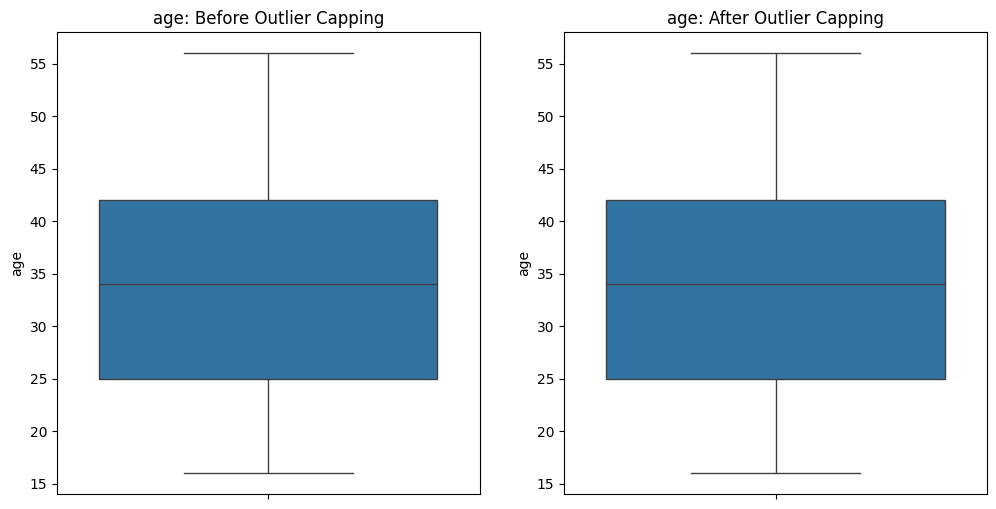

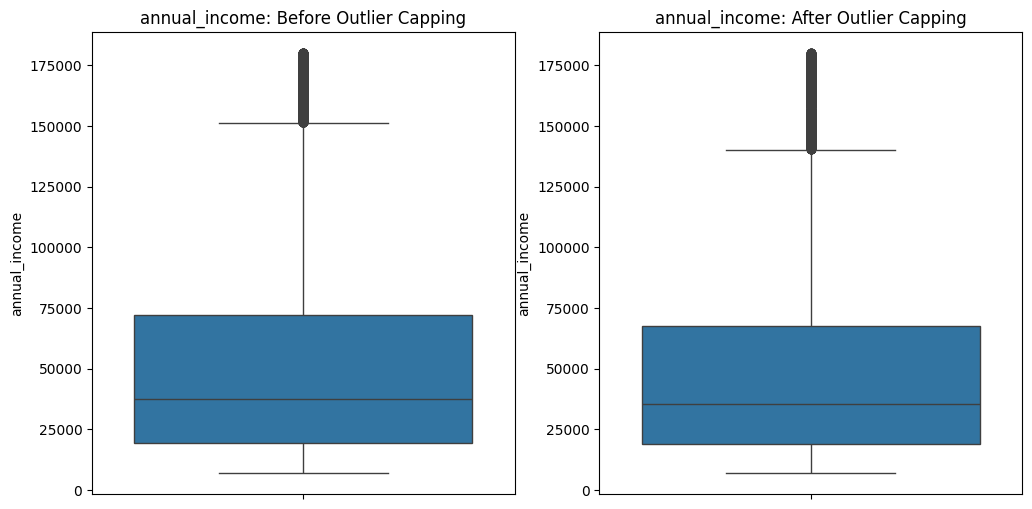

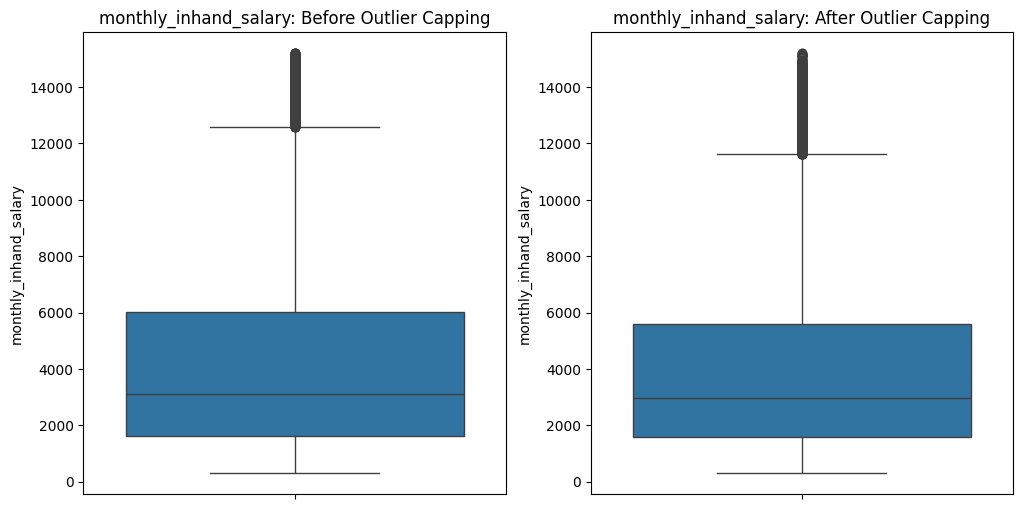

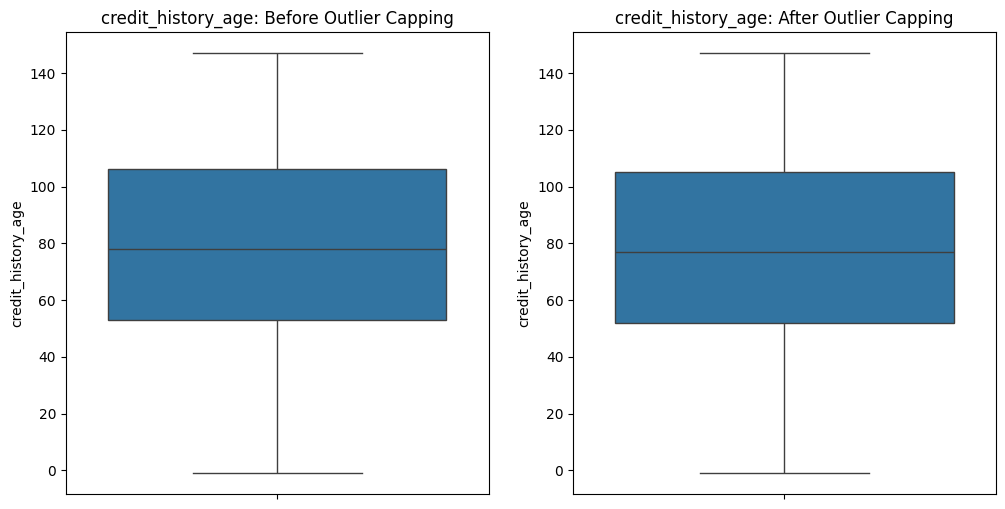

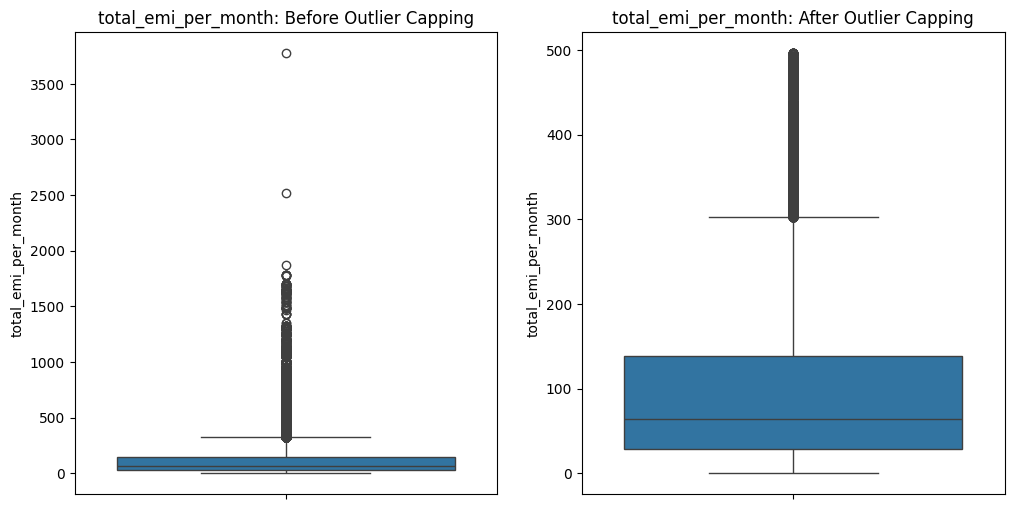

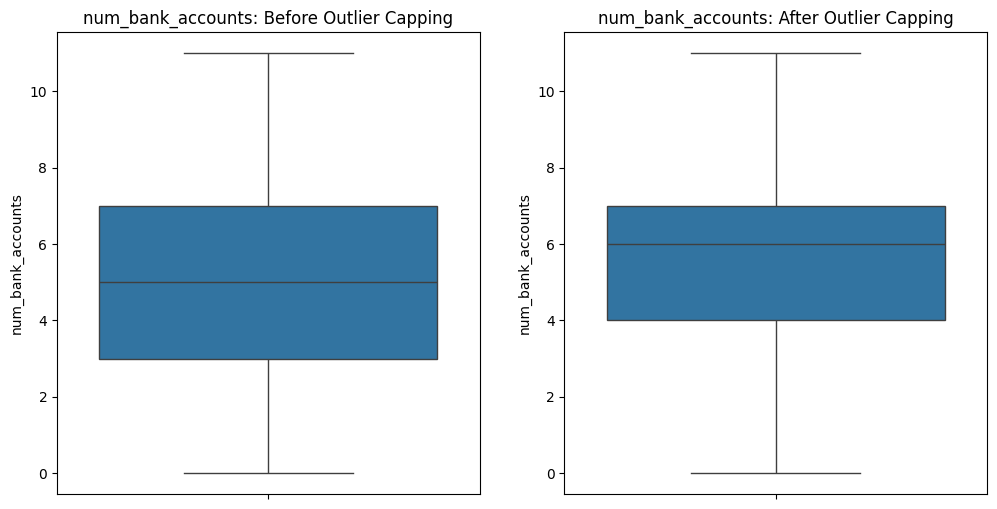

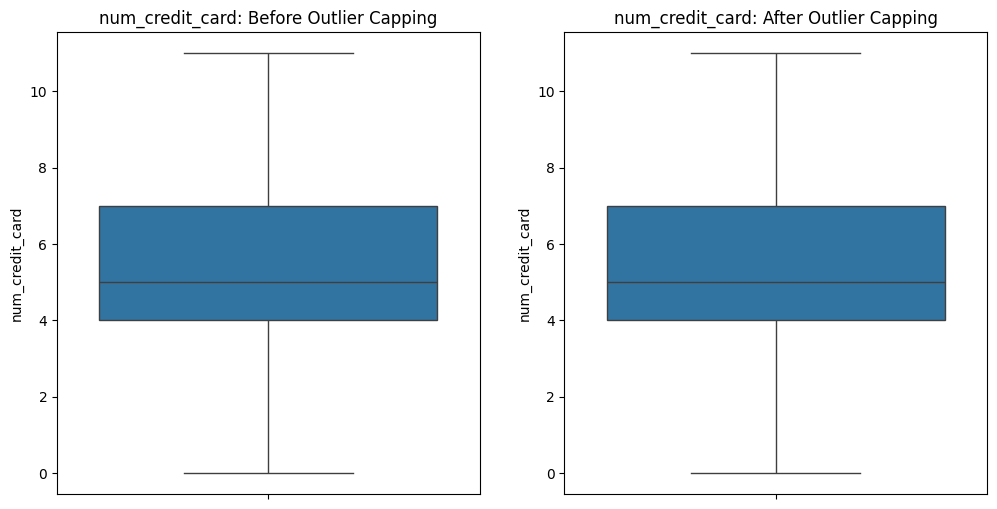

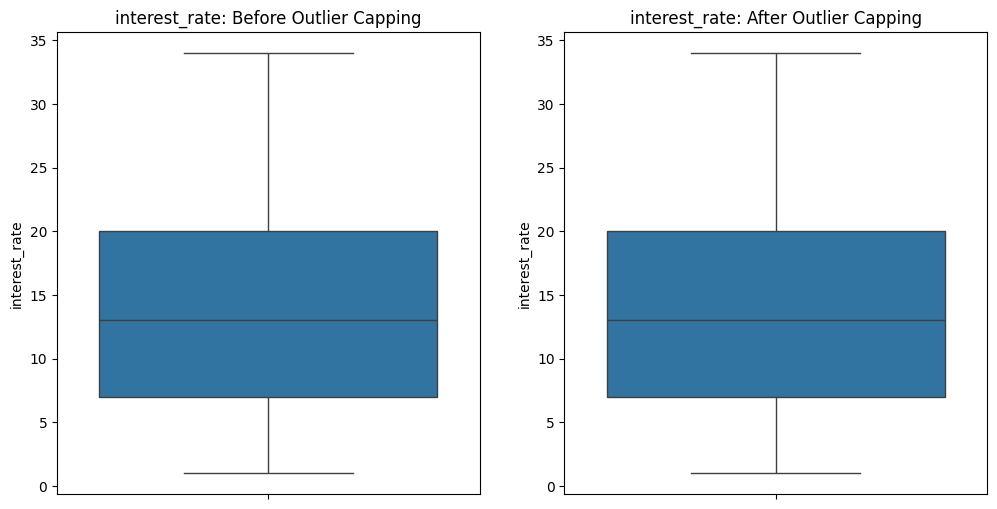

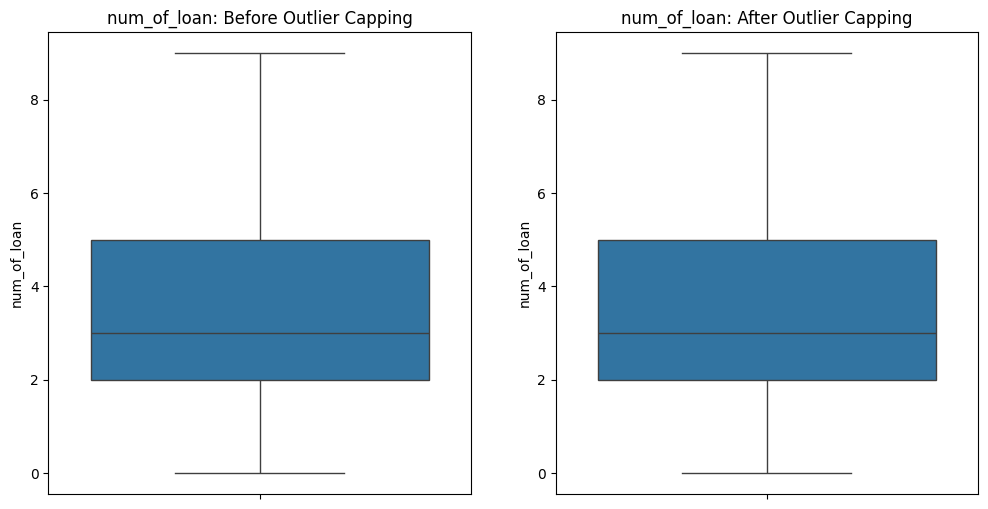

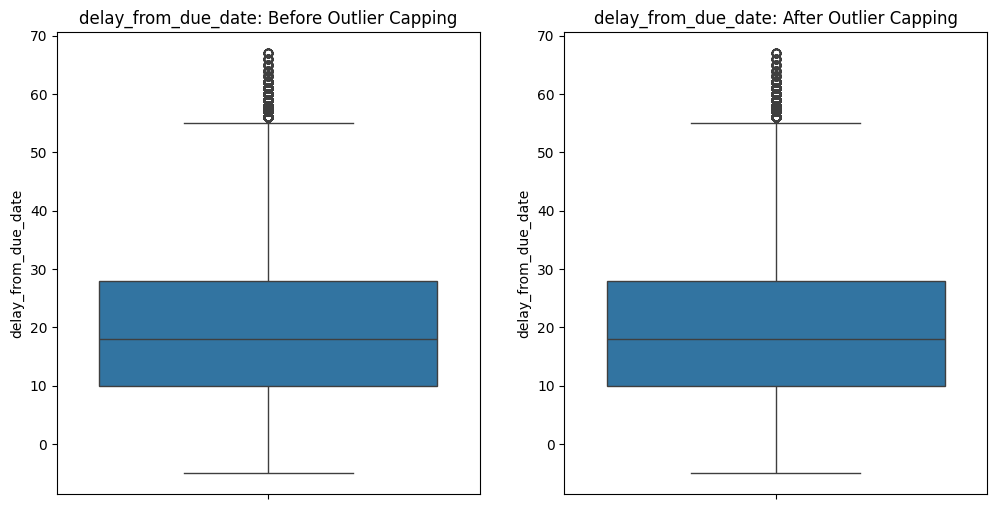

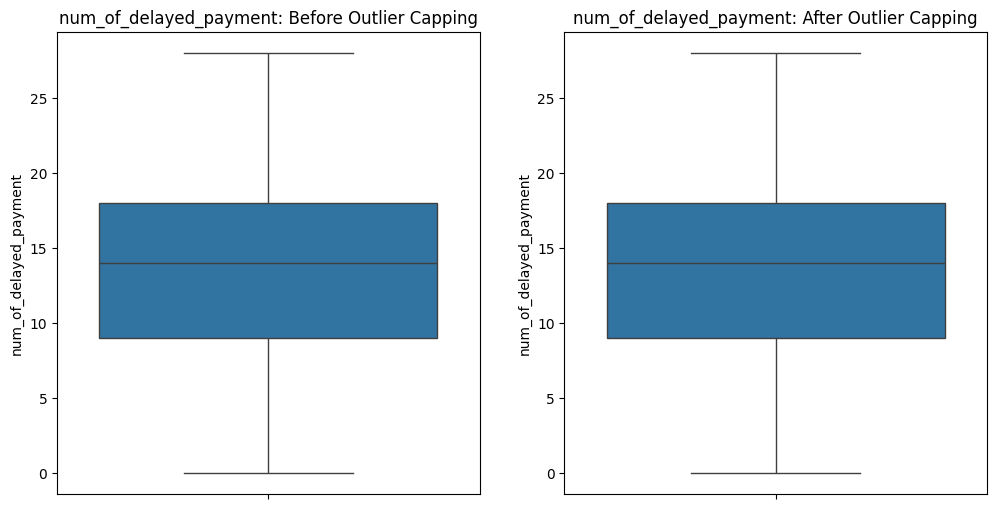

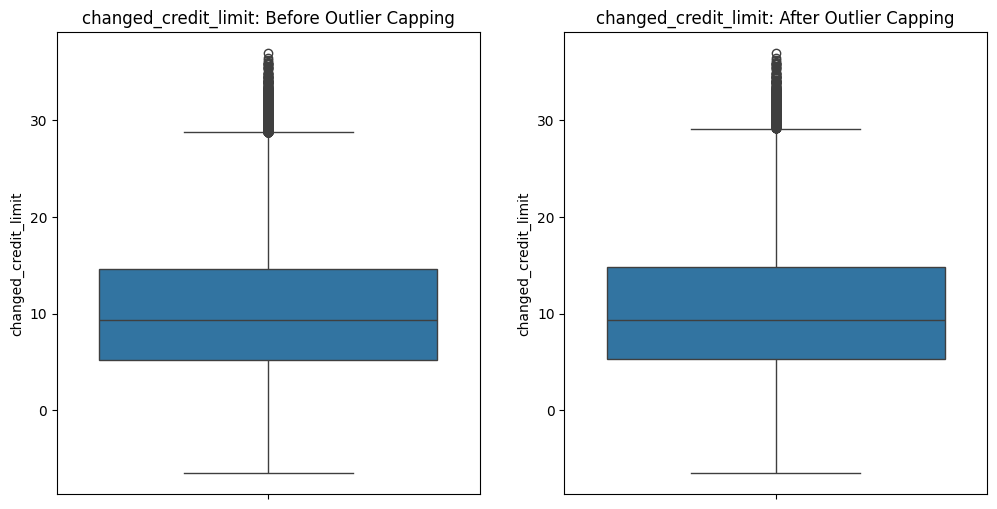

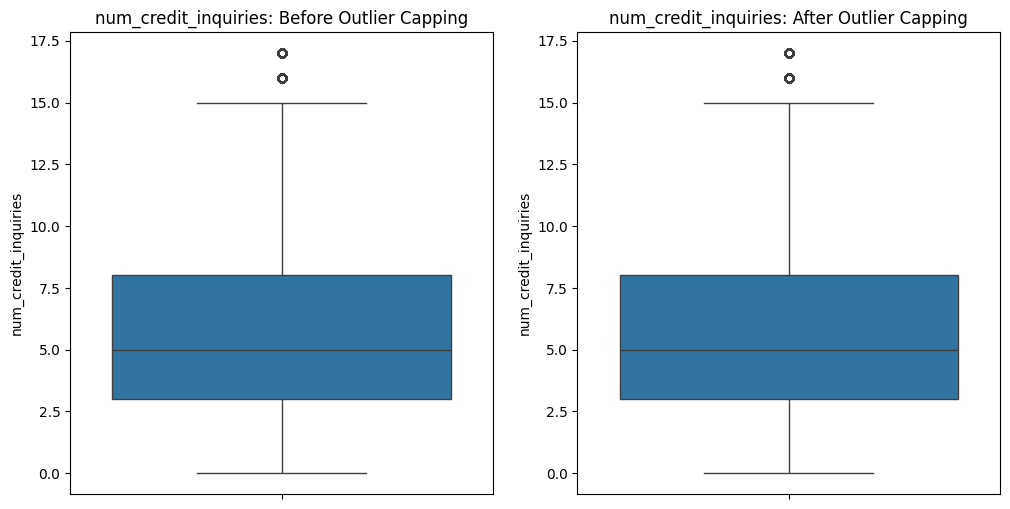

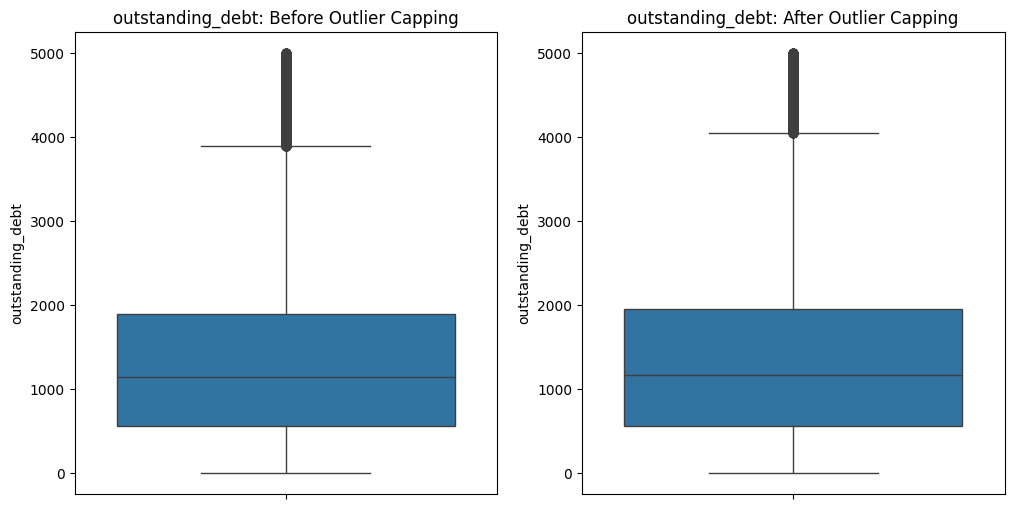

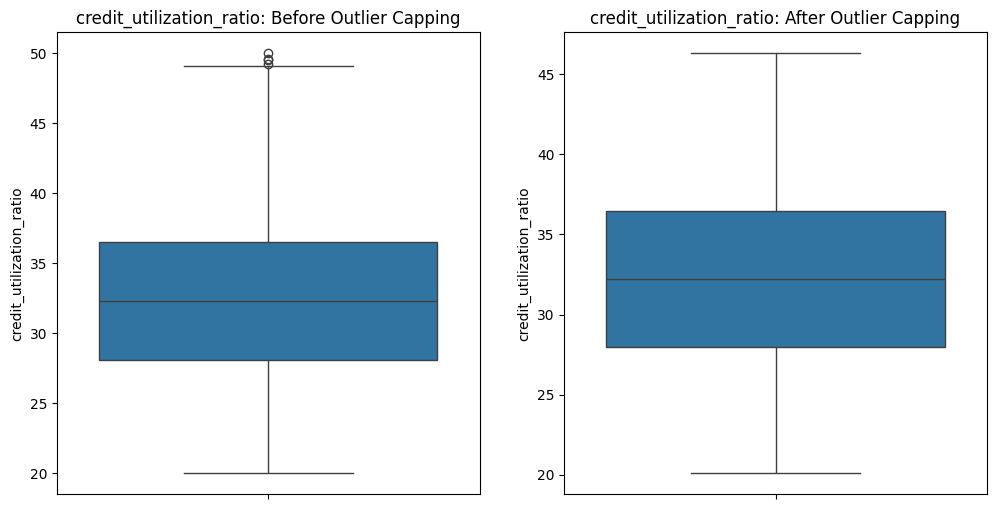

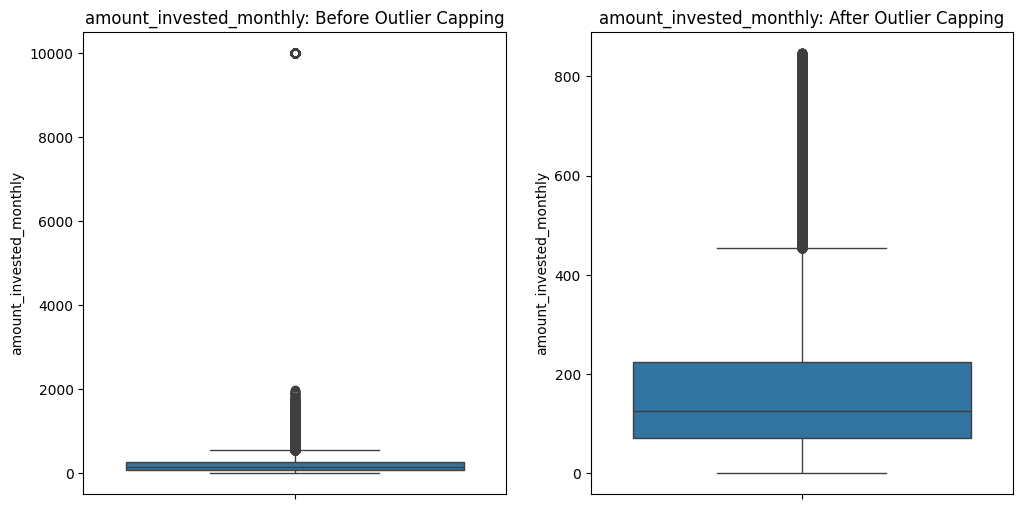

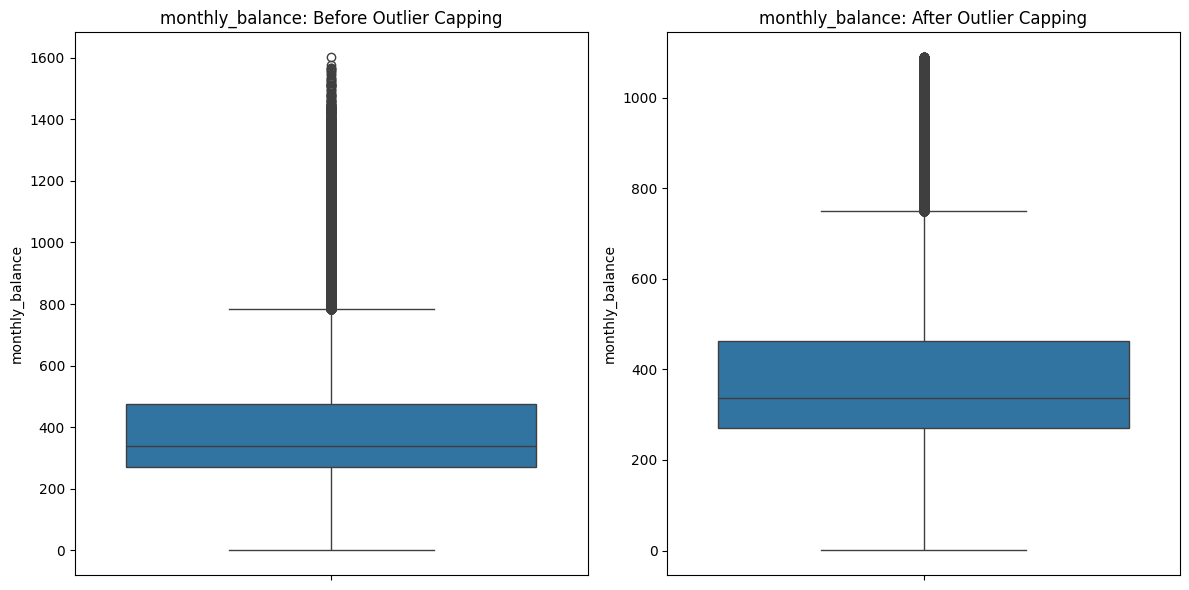

In [ ]:
box_plot_comparison(df, df_outlier_removed, numerical_columns)

**EDA**

In [ ]:
df = df_outlier_removed

In [ ]:
df.isnull().sum()

,0
id,0
customer_id,0
month,0
name,0
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0
credit_history_age,0


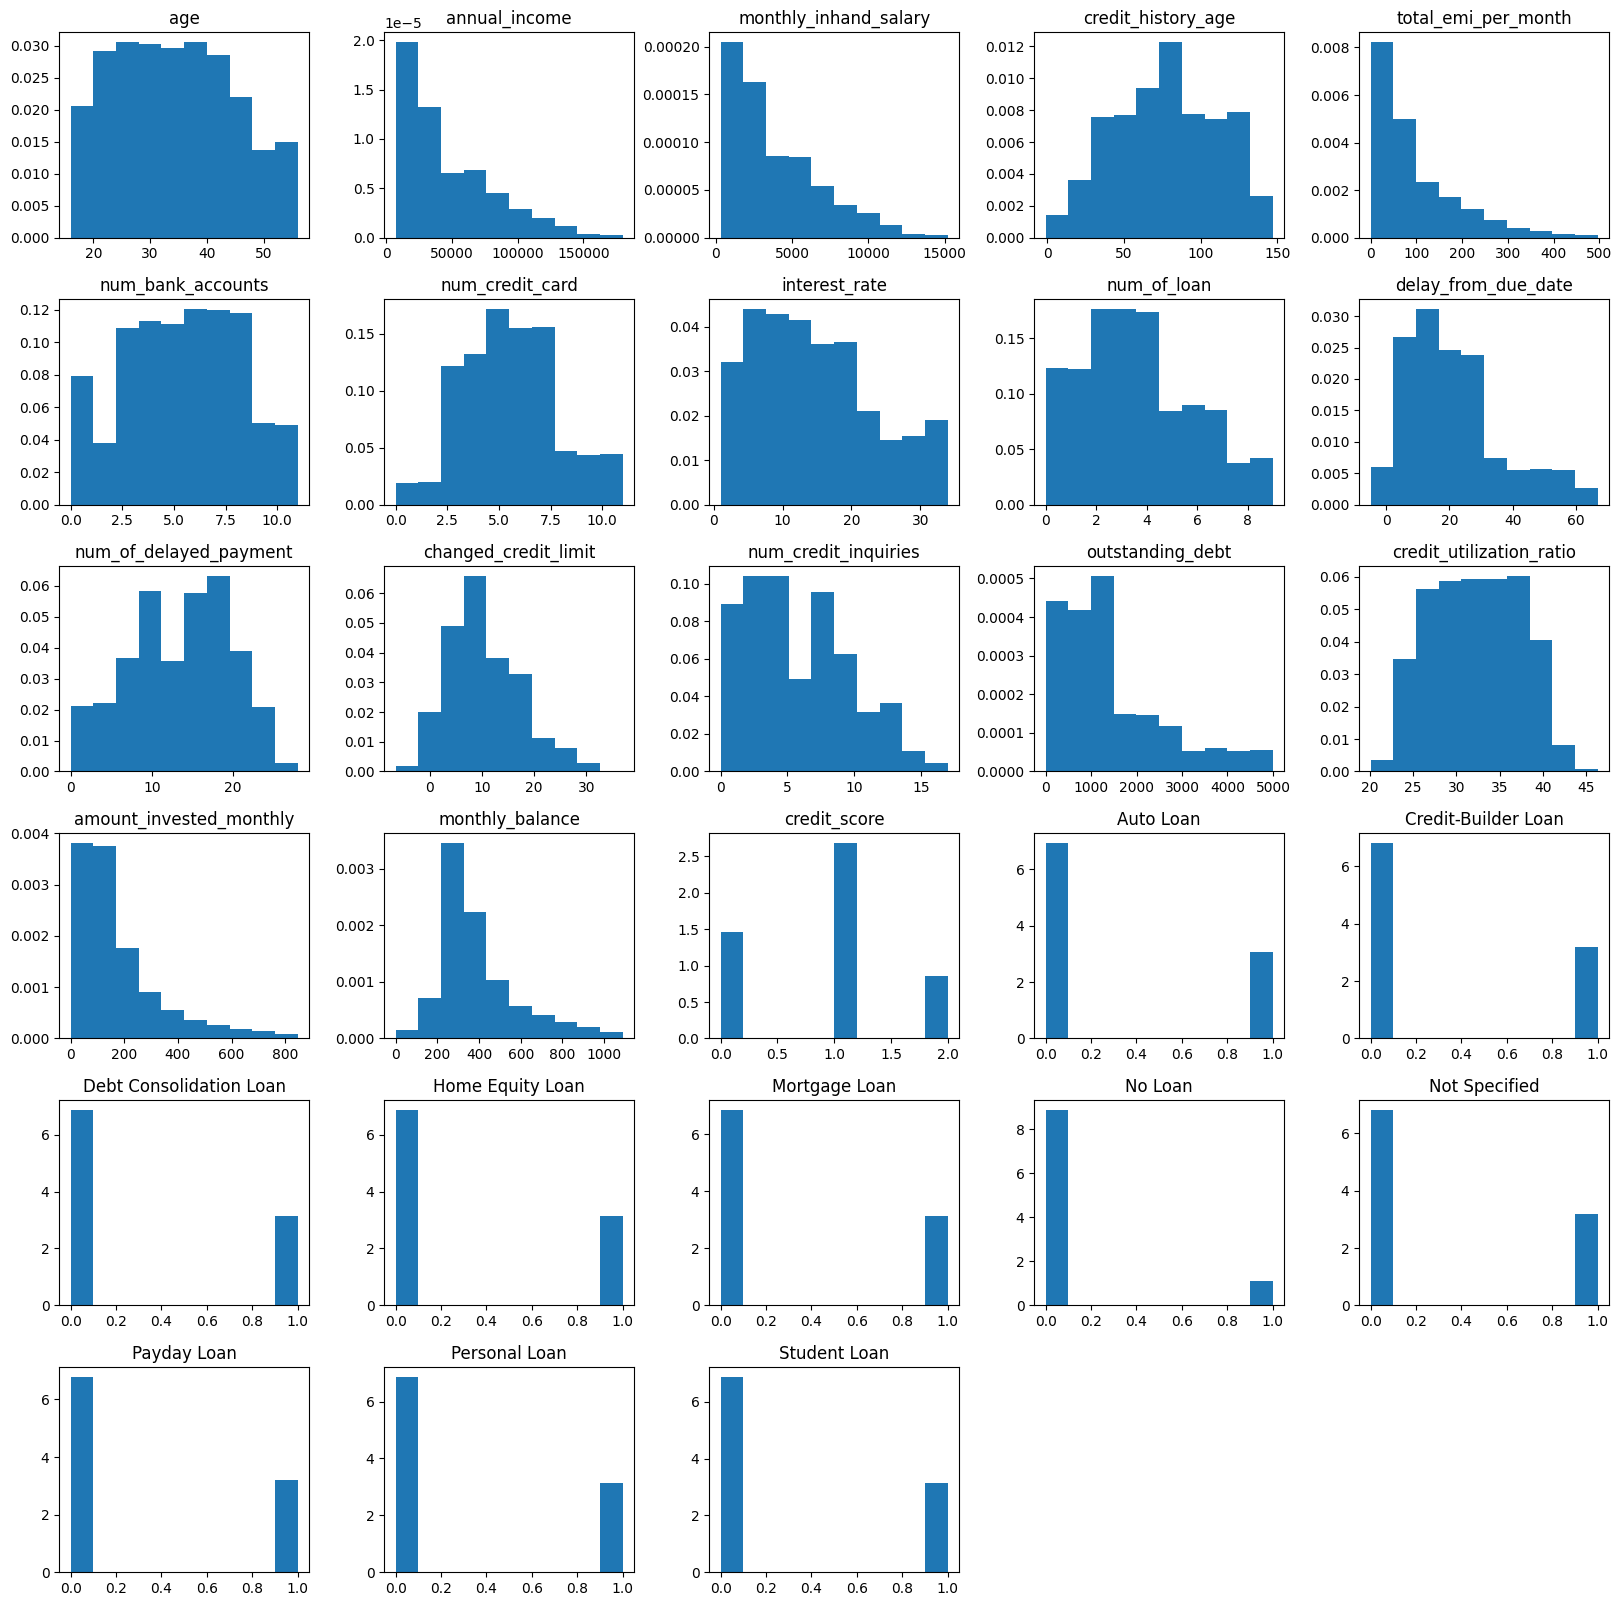

In [ ]:
#Histogram
df.hist(figsize = (20,20), grid = False, density = True)
plt.show()

In [ ]:
# #Heat Map
# plt.figure(figsize = (10,5))
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, cmap = "BrBG", annot = True)
# plt.show()

In [ ]:
credit_score_values = df['credit_score'].unique()

credit_score_values

array([2, 1, 0])

In [ ]:
credit_score_value = df.credit_score.value_counts().index
credit_score_counts = df.credit_score.value_counts().values

credit_score_value,credit_score_counts

(Index([1, 0, 2], dtype='int64', name='credit_score'),
 array([47270, 25746, 15081]))

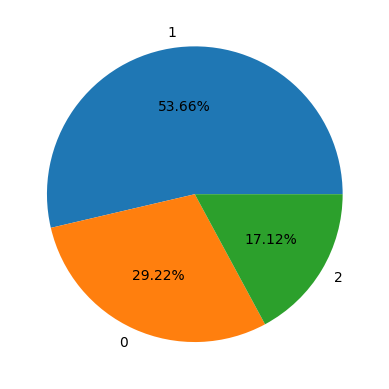

In [ ]:
plt.pie(credit_score_counts, labels = credit_score_value, autopct = '%.2f%%', radius = 1)
plt.show()

In [ ]:
def create_stackbar(data, col1, col2, rotation = 0):
  pd.crosstab(data[col1], data[col2]).plot(kind = 'bar', stacked = True)

  plt.title(f'{col1} & {col2} Distribution')
  plt.xlabel(f'col1')
  plt.ylabel(f'Number of Observation')

  plt.xticks(rotation = rotation)
  plt.show()

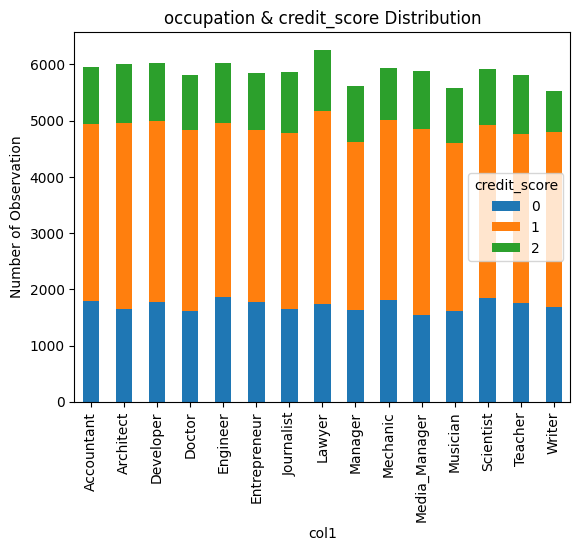

In [ ]:
create_stackbar(df,'occupation','credit_score', rotation = 90)


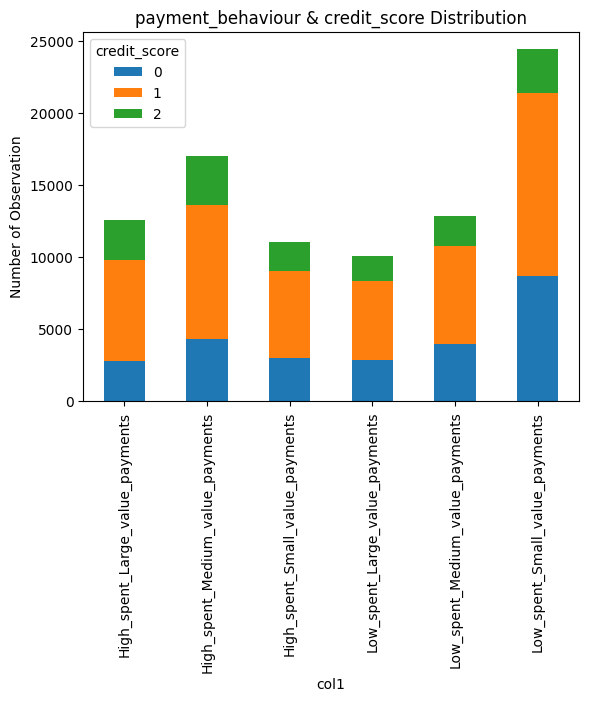

In [ ]:
create_stackbar(df,'payment_behaviour','credit_score', rotation = 90)


**Encoding**

In [ ]:
df.shape

(88097, 37)

In [ ]:
df = df.reset_index(drop = True)
df_ = df.copy()

In [ ]:
df_.drop('credit_score', axis = 1, inplace = True)
X_train = df_.copy()
y_train = df['credit_score']

In [ ]:
y_train

,credit_score
0,2
1,2
2,2
3,2
4,2
...,...
88092,0
88093,0
88094,0
88095,1


In [ ]:
X_train.shape,y_train.shape

((88097, 36), (88097,))

In [ ]:
categorical_columns = X_train.select_dtypes(include = 'object').columns.tolist()
X_train.describe(include = 'object').T

,count,unique,top,freq
id,88097,88097,0x1602,1
customer_id,88097,12015,CUS_0xd40,8
month,88097,8,January,11118
name,88097,9815,Stevex,46
ssn,88097,12015,821-00-0265,8
occupation,88097,15,Lawyer,6261
credit_mix,88097,3,Standard,40831
payment_of_min_amount,88097,2,Yes,52519
payment_behaviour,88097,6,Low_spent_Small_value_payments,24414


In [ ]:
categorical_columns

['id',
 'customer_id',
 'month',
 'name',
 'ssn',
 'occupation',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

In [ ]:
categorical_columns.remove('id')
categorical_columns.remove('customer_id')
categorical_columns.remove('month')
categorical_columns.remove('ssn')
categorical_columns.remove('name')
categorical_columns

['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder(categories='auto', sparse_output=False)

for column in categorical_columns:
  encoded_column = onehotencoder.fit_transform(X_train[column].values.reshape(-1,1))
  unique_values = X_train[column].unique().tolist()
  column_list = []
  for value in unique_values:
    column_list.append(str(column)+'_'+ str(value))

  encoded_column_X = pd.DataFrame(encoded_column,columns = column_list)
  X_train = pd.concat([X_train.drop(column,axis = 1),encoded_column_X],axis = 1)


In [ ]:
X_train.shape

(88097, 58)

In [ ]:
X_train.drop('id', axis = 1, inplace = True)
X_train.drop('customer_id', axis = 1, inplace = True)
X_train.drop('ssn', axis = 1, inplace = True)
X_train.drop('name', axis = 1, inplace = True)

In [ ]:
X_train['month'] = pd.to_datetime(X_train.month, format = '%B').dt.month

In [ ]:
for i in range(X_train.shape[0]):
  print(X_train['month'][i])

Streaming output truncated to the last 5000 lines.
8
1
2
3
5
6
7
8
2
3
4
6
1
2
3
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
3
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
7
8
1
2
3
4
5
6
7
8
1
2
3
4
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
1
2
3
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
4
5
6
7
8
1
2
3
4
5
7
8
3
5
6
8
1
2
3
4
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
5
1
2
3
4
5
6
7
8
1
2
3
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
3
4
5
6
7
1
2
3
4
5
6
7
8
1
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
4
5
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7

In [ ]:
X_train.shape, y_train.shape

((88097, 54), (88097,))

In [ ]:
columns = X_train.columns.tolist()
for x in columns:
  print('\n',x,X_train[x].unique())


 month [1 2 3 4 5 6 7 8]

 age [23 28 34 54 55 21 31 33 30 24 44 45 40 41 32 35 36 39 37 20 46 26 42 19
 48 38 43 22 16 18 27 25 17 47 53 29 49 51 50 52 56]

 annual_income [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]

 monthly_inhand_salary [ 1824.8434  3037.9866 12187.22   ...  3097.0083  1929.9066  3359.4158]

 credit_history_age [ 89  93  91  92  94  95  99 111 112 113 114 115 108 109 110  77  78  83
  73  74  75  71  72  76 128 129 130 131 124 125 126 127 132 135 133 134
  60  64  65  66  67  61  62  88  90 106 117  79  80  81  82  84 105 107
 104  43  36  37  38  39  40  44  42  68  69  70 118 119 120 122  29  30
  31  32  33  34  28  85  86  41  45  46  47  48 137 138 139 141 136  51
  52  53  54  55  56  58  57  63  59 123  98 116  35 100 101 102 103   6
   7   8   9  10  11  12  16  49  50  87  22  23  24  25  26  27  19  13
  14  15  17  18  21  20 140 121  97  96 143   1   2   3   4   5 142 145
 147 146   0  -1]

 total_emi_per_month [ 49.574947  18.816

In [ ]:
y_train

,credit_score
0,2
1,2
2,2
3,2
4,2
...,...
88092,0
88093,0
88094,0
88095,1


In [ ]:
X_train

,month,age,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,...,credit_mix_Standard,credit_mix_Bad,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Large_value_payments
0,1,23,19114.12,1824.8434,89,49.574947,3,4,3,4,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,23,19114.12,1824.8434,93,49.574947,3,4,3,4,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,23,19114.12,1824.8434,91,49.574947,3,4,3,4,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,23,19114.12,1824.8434,92,49.574947,3,4,3,4,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,23,19114.12,1824.8434,93,49.574947,3,4,3,4,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88092,4,25,39628.99,3359.4158,130,35.104023,4,6,7,2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88093,5,25,39628.99,3359.4158,131,35.104023,4,6,7,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88094,6,25,39628.99,3359.4158,132,35.104023,4,6,7,2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88095,7,25,39628.99,3359.4158,133,35.104023,4,6,7,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


** Feature Reduction** **

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif



In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
feature_importance = random_forest.feature_importances_
top_feature_random_forest = X_train.columns[feature_importance.argsort()[-10:][::-1]]

rfe_selection = RFE(estimator=RandomForestClassifier(), n_features_to_select = 10, step = 1)
rfe_selection.fit(X_train,y_train)
top_feature_rfe = X_train.columns[rfe_selection.support_]

univariate_feature_selection = SelectKBest(score_func = f_classif, k = 10)
univariate_feature_selection.fit(X_train,y_train)
top_feature_univariate = X_train.columns[univariate_feature_selection.get_support()]



In [ ]:
important_columns = list(set(top_feature_random_forest.tolist() + top_feature_rfe.tolist() + top_feature_univariate.tolist()))
important_columns

In [ ]:
X_train = X_train[important_columns]

In [ ]:
X_train.shape

In [ ]:
corr_matrix = X_train.corr()

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, cmap = 'BrBG', annot = True)
plt.show()

In [ ]:
correlated_pairs = []
for x in corr_matrix:
  for y in corr_matrix:
    if(x != y):
      if(np.abs(corr_matrix.loc[x,y]) > 0.7):
        if((x,y) not in correlated_pairs):
          if((y,x) not in correlated_pairs):
            correlated_pairs.append((x,y))

correlated_list = []
for z in correlated_pairs:
  correlated_list.append(z[0])

correlated_list = list(set(correlated_list))

correlated_list


In [ ]:
X_train.drop(correlated_list,axis = 1, inplace = True)

In [ ]:
corr_matrix = X_train.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, cmap = 'BrBG', annot = True)
plt.show()

Variance Inflation Factor(VIF) check...

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_df = pd.DataFrame()
vif_df['Variable'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

vif_df

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)
y_train.value_counts()

In [ ]:
X_train,X_val,y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2,random_state = 123, shuffle = True)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

In [ ]:
decision_tree = make_pipeline(MinMaxScaler(),StandardScaler(),DecisionTreeClassifier())
random_forest = make_pipeline(MinMaxScaler(),StandardScaler(),RandomForestClassifier())
knn = make_pipeline(MinMaxScaler(),StandardScaler(),KNeighborsClassifier(n_neighbors=5))
gaussian_nb =  make_pipeline(MinMaxScaler(),StandardScaler(),GaussianNB())
svc = make_pipeline(MinMaxScaler(),StandardScaler(),LinearSVC(C = 1))

In [ ]:
classifiers = [decision_tree,random_forest,knn,gaussian_nb,svc]
accuracy = []
precision = []
recall = []


In [ ]:
for classifier in classifiers:
  avg_accuracy = cross_val_score(classifier, X_train, y_train,cv = 5, scoring='accuracy').mean()
  accuracy.append(avg_accuracy)
  avg_precision = cross_val_score(classifier,X_train,y_train, cv = 5, scoring='precision_macro').mean()
  precision.append(avg_precision)
  avg_recall = cross_val_score(classifier, X_train, y_train, cv = 5, scoring='recall_macro').mean()
  recall.append(avg_recall)




In [ ]:
print(accuracy,'\n')
print(precision,'\n')
print(recall,'\n')






In [ ]:
rfc = RandomForestClassifier(
                             class_weight= 'balanced',
                             bootstrap = True,
                             ccp_alpha = 0.0,
                             criterion = 'gini',
                             max_depth = None,
                             max_features = 'sqrt',
                             max_leaf_nodes = None,
                             max_samples = None,
                             min_impurity_decrease = 0.0,
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             min_weight_fraction_leaf = 0.0,
                             n_estimators = 100,
                             n_jobs = None,
                             oob_score = False,
                             random_state = None,
                             verbose = 0,
                             warm_start = False)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val,y_pred)

sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred))